In [ ]:
%pip install numpy pandas matplotlib scikit-learn xgboost

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

import time

In [2]:
DATA_PATH = 'datasets/preprocessed/CICIDS2017.csv'
data = pd.read_csv(DATA_PATH)

data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# since many columns just have 0 values, drop them

data = data.loc[:, (data!=0).any(axis=0)]
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
for column in data.columns:
    if column == ' Label': continue 
    data[column] = data[column]  / data[column].abs().max() 

X = data.drop(' Label', axis=1)
y = data[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,135447.000000,1.354470e+05,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,...,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000
mean,0.135095,1.359013e-01,0.002537,0.001565,0.005092,0.001160,0.045669,0.018928,0.042281,0.031791,...,0.001723,0.413032,0.001853,0.000307,0.002073,0.001786,0.086552,0.055062,0.107754,0.065263
std,0.301104,2.631224e-01,0.008091,0.007517,0.017546,0.007418,0.158539,0.111026,0.129910,0.118442,...,0.006449,0.080061,0.007750,0.004233,0.008601,0.007659,0.182962,0.194870,0.224779,0.166377
min,0.000000,-8.333338e-09,0.000518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001221,5.999878e-04,0.001035,0.000340,0.000142,0.000000,0.000514,0.000000,0.001552,0.000000,...,0.000518,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001221,1.209920e-02,0.001553,0.001360,0.000164,0.000032,0.001712,0.000000,0.002241,0.000792,...,0.001036,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.001221,7.370359e-02,0.002588,0.001700,0.000344,0.002243,0.002911,0.004076,0.008275,0.001534,...,0.002071,0.384615,0.000019,0.000000,0.000019,0.000019,0.069035,0.000000,0.069250,0.062206
max,1.000000,1.000000e+00,1.000000,1.000000,0.617140,0.965020,0.992723,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.501000,0.372152,0.501000,0.501000,1.000000,1.000000,1.000000,1.000000


In [11]:
rf = RandomForestClassifier()
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
print("train time:", end-start)

train time: 16.814332008361816


In [6]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.99987818113358


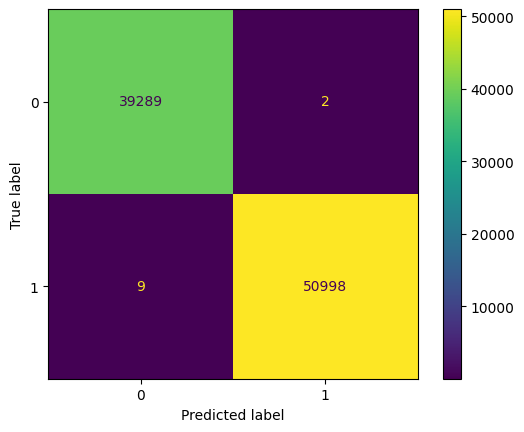

In [7]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();